<a href="https://colab.research.google.com/github/twanglom/EGRO-Framework/blob/main/egro_Six_hump_camel_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Efficient Global Robust Optimization Framework**

*   (Last Updated: 21/8/2024)




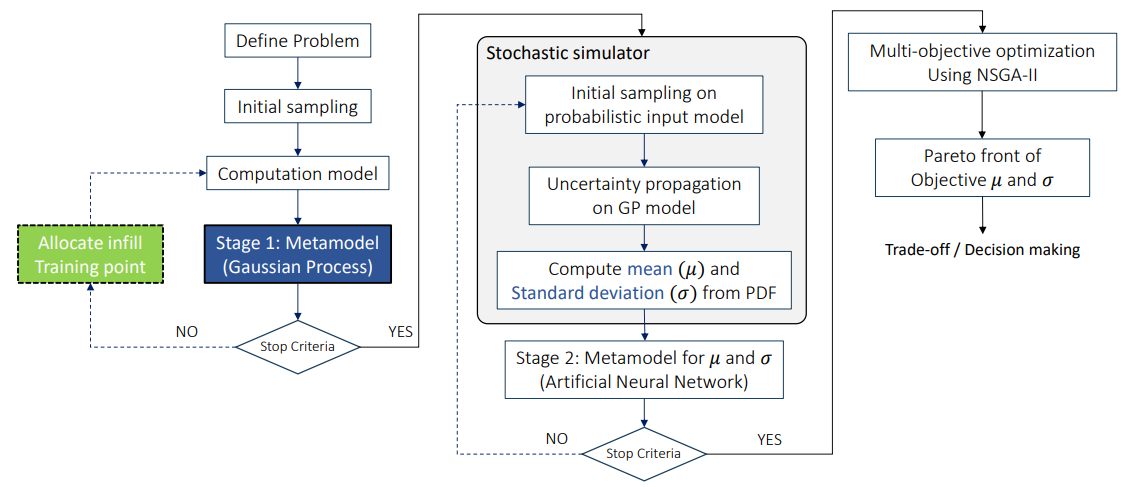




*   (Thanasak W., 2024)



**Package Requirement**

In [ ]:
!pip install torch
!pip install gpytorch
!pip install pymoo
!pip install optuna
!pip install pyDOE
!pip install scikit-learn

**Initial Runing Path**

In [3]:
%cd /content/drive/MyDrive/PhD/EGRO_Six-Hump_Camel_function

/content/drive/MyDrive/PhD/EGRO_Six-Hump_Camel_function


**Verified Runtime Type**

In [ ]:
import torch
if torch.cuda.is_available():
    print("CUDA is available. GPU details:")
    print(f"Device Name: {torch.cuda.get_device_name(0)}")
    print(f"Device Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("CUDA is not available. Running on CPU.")


CUDA is not available. Running on CPU.


**Example Problem**

- Objective Function

The function $f(X_1, X_2)$ is defined as:

$$
f(X_1, X_2) = \left(4 - 2.1X_1^2 + \frac{X_1^4}{3}\right)X_1^2 + X_1X_2 + \left(-4 + 4X_2^2\right)X_2^2
$$

---

- Input Information

| Description                     | Value                  |
| --------------------------------|------------------------|
| **Design Variable**             | $X_1$, $X_2$         |
| **Design Range**                | (-3, 3), (-2, 2)       |
| **Number of Initial Samples**   | 350                     |
| - Training set                  | 250                     |
| - Validation set                | 100                     |
| **Number of Initial Samples (EGO)**   | 150               |
| - Training set                  | 50                     |
| - Validation set                | 100                     |

---

- Uncertainty Variable

| Variable   | COV  | Distribution |
|------------|------|--------------|
| $X_1$ | 10%  | Normal       |
| $X_2$ | 10%  | Normal       |

---

- Deterministic Solution

Global minima: $f(X_1, X_2) = -1.0316$ at $(X_1, X_2) = (0.0898, -0.7126)$ and $(-0.0898, 0.7126)$

---


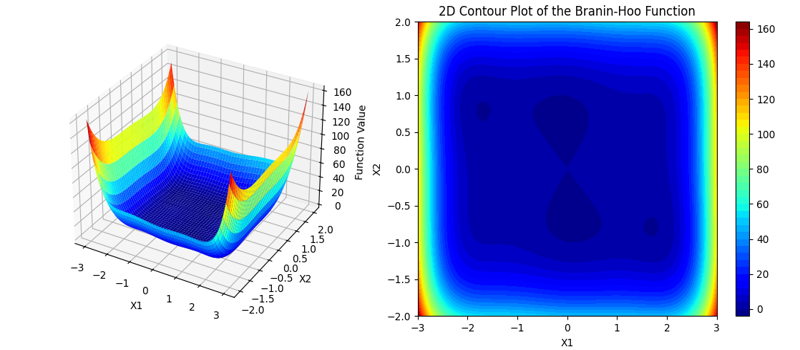

In [4]:
from PIL import Image
from IPython.display import display
img1 = Image.open('RESULT_MODEL/3D_plot.png')
img1 = img1.resize((800, 350))
display(img1)

**STEP 1: Initial Design Sample and Evaluate Objective**

In [ ]:
!python step_0_initial_design.py

Training sample data saved to 'DATA_PREPARATION/training_data.csv'.
Testing sample data saved to 'DATA_PREPARATION/testing_data.csv'.
All information data saved to data_info.json.


**STEP 2: Constructing Stage 1 Gaussian Process Regression**
- This step will demonstrate the hyperparameter optimization, model traning and validaditon by testing data set
- all result file will be saved into log data as:

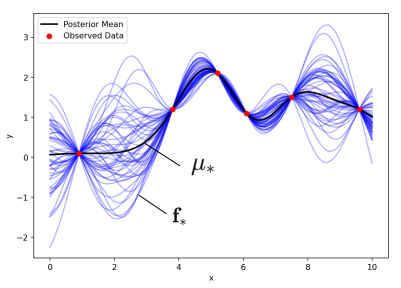







#### **GPR Model**


- **Prior Distribution (Before Observing Data)**


Given a set of training inputs $\{ x_1, x_2, \dots, x_n \}$, the function $f$ is modeled as:

$\hspace{3cm}$ $f = [f(x_1), f(x_2), \dots, f(x_n)]^T \sim \mathcal{N}(0, \mathbf{K})$

Where:
$\mathbf{K} $ is the covariance matrix generated using a kernel function $k(x, x')$

For example, with the Matérn 3/2 kernel:

$\hspace{4cm}$ $
k(x, x') = \sigma_f^2 \left( 1 + \frac{\sqrt{3} \lvert x - x' \rvert}{\ell} \right) \exp\left( -\frac{\sqrt{3} \lvert x - x' \rvert}{\ell} \right)
$

- Covariance Matrix Between Training Points

$
\mathbf{K} = \begin{bmatrix}
k(x_1, x_1) + \sigma_y^2 & k(x_1, x_2) & \dots & k(x_1, x_n) \\
k(x_2, x_1) & k(x_2, x_2) + \sigma_y^2 & \dots & k(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
k(x_n, x_1) & k(x_n, x_2) & \dots & k(x_n, x_n) + \sigma_y^2
\end{bmatrix}
$

- Where hyperparameter:

$\hspace{2cm}$ $\ell$ is the length scale

$\hspace{2cm}$ $\sigma_f^2$ is the variance of the kernel (output scale)

$\hspace{2cm}$ $\sigma_y$ is the noise signal

- *We are going to sample* $f_*$ at $x_*$ *given the observed data* $Y_{train}$.

---

- **Posterior Distribution (After Observing Data)**

Given training data $X_{train}$, $Y_{train}$ and test input $x_*$, the posterior distribution for $f_*$ is given by:

$\hspace{5cm}$ $f_* \mid X, y, X_* \sim \mathcal{N}(\mu_*, \Sigma_*)$

Where:
- Mean: $\mu_* = \mathbf{K}_* \mathbf{K}^{-1} Y_{train}$
- Covariance: $\Sigma_* = \mathbf{K}_{**} - \mathbf{K}_* \mathbf{K}^{-1} \mathbf{K}_*^T$

Where:
- $\mathbf{K}_*$is the matrix of covariance between test points and training points.
- $\mathbf{K}_{**}$ is the matrix of covariance between test points.




In [ ]:
# Run file with ego (recommend for small data set)
!python step_1_stage1_meta_training_ego.py

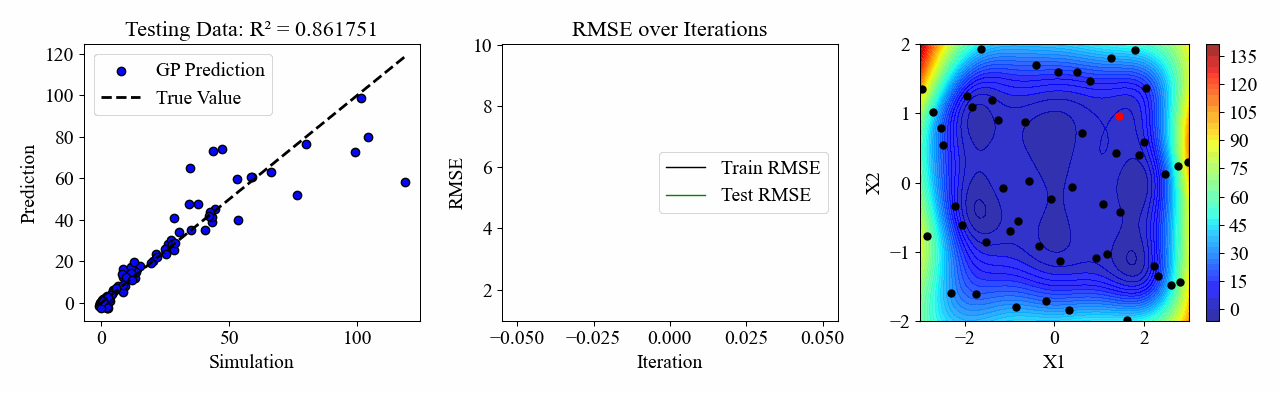

In [5]:
from PIL import Image
from IPython.display import display, Image as IPImage
gif_path = 'RESULT_R2_STAGE1_METAMODEL/r2_animation.gif'
gif = Image.open(gif_path)
display(IPImage(filename=gif_path))


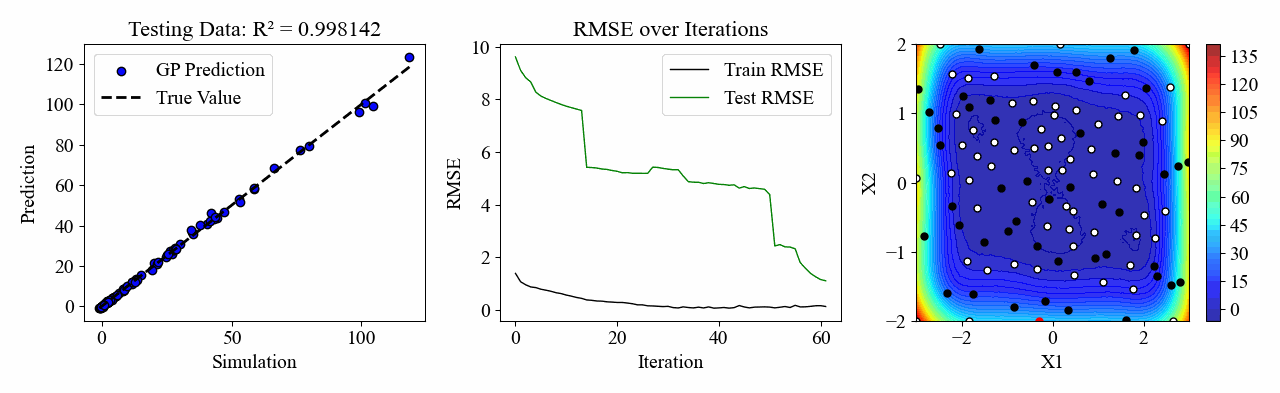

In [6]:
from PIL import Image
from IPython.display import display, Image as IPImage
frame_path = 'RESULT_R2_STAGE1_METAMODEL/last_frame.png'
display(IPImage(filename=frame_path))

# Description Data Point: Black - Initial design sample,  White - Infill sample over iteration

In [7]:
# Run file without ego (recommend for large data set)
!python step_1_stage1_meta_training.py

Using Device: cpu
**********
Learned hyperparameters:
Lengthscale: 1.2980045080184937
Outputscale (Variance): 5.816479682922363
Noise: 0.00011999836715403944
Training MSE: 0.003984746692770031, Test MSE: 0.5947625020825715
Training R²: 0.999994442630239, Testing R²: 0.9990944444933405


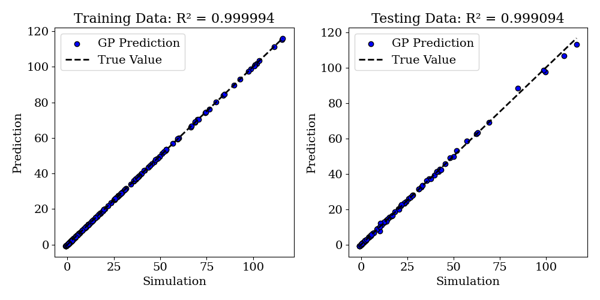

In [8]:
from PIL import Image
from IPython.display import display
img1 = Image.open('RESULT_R2_STAGE1_METAMODEL/response_r2.png')
img1 = img1.resize((600, 300))
display(img1)


**STEP 3: Stochastic Simulator**


*   Load GPR model and the information of input range and distribution
*   Perform replication using Monte Carlo Simulation $10^6$ and $2500$ LHS samples
*   Estimate PDF, calculation μ and σ
*   Save all result in .csv file

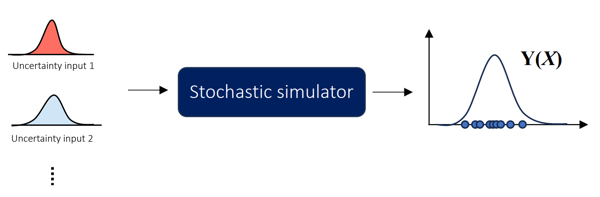



In [ ]:
!python step_2_uncertainty_propagating_mcs.py

**STEP 3: Constructing Stage 2 Multi-Layer Neural Network model**

*   This step will demonstrate the hyperparameter optimization, model traning and validaditon by testing data set

*   List item all result file will be saved into log data

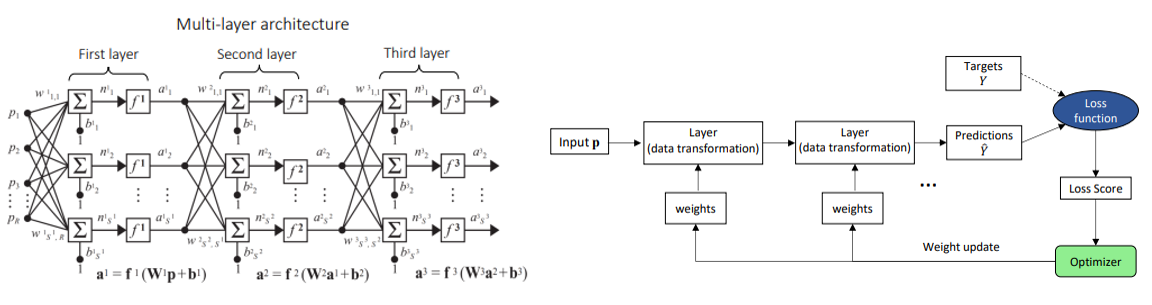


In [ ]:
!python step_3_stage2_meta_hyperparam.py

In [12]:
!python step_3_stage2_meta_training.py

CUDA is not available. Running on CPU.
**********
Training the mean model...
**********
Training the std model...
**********
Mean Model Train R² Score: 0.9989
Mean Model Test R² Score: 0.9983
Std Model Train R² Score: 0.9933
Std Model Test R² Score: 0.9886


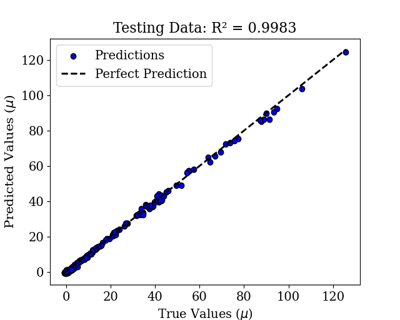

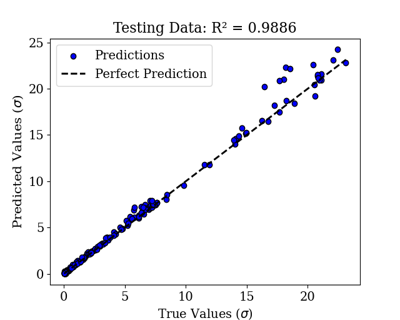

In [13]:
from PIL import Image
from IPython.display import display
img1 = Image.open('RESULT_R2_STAGE2_METAMODEL/mean_test_r2.png')
img1 = img1.resize((400, 320))
display(img1)
img2 = Image.open('RESULT_R2_STAGE2_METAMODEL/std_test_r2.png')
img2 = img2.resize((400, 320))
display(img2)



**STEP 4: Multi-Objective Optimization**

*   Finding the best trade-off solution (pareto front) using NSGA-II
*   The optimized result will be saved to log file.


In [ ]:
!python step_4_multi_objective_optimization.py

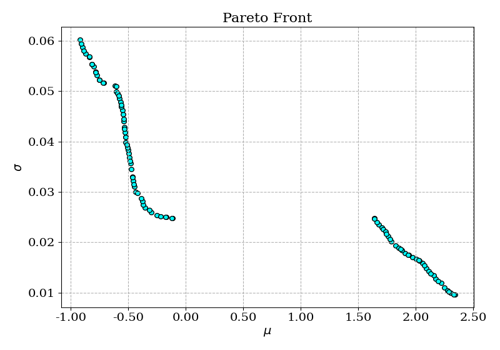

In [15]:
from PIL import Image
from IPython.display import display
img1 = Image.open('RESULT_PARETO_FRONT/pareto_front.png')
img1 = img1.resize((500, 350))
display(img1)

## Pareto Front (Non-Dominate solution)

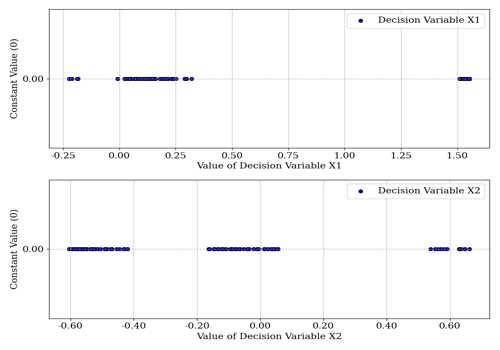

In [16]:
from PIL import Image
from IPython.display import display
img2 = Image.open('RESULT_PARETO_FRONT/pareto_set.png')
img2 = img2.resize((500, 350))
display(img2)

## Decision solution